# Food Vision

In [50]:
# Get helper functions
import os
!wget https://raw.githubusercontent.com/Ammar-Raneez/TF_Learning_ZTM/main/helper_functions.py

--2022-10-04 04:47:31--  https://raw.githubusercontent.com/Ammar-Raneez/TF_Learning_ZTM/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9822 (9.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.59K  --.-KB/s    in 0s      

2022-10-04 04:47:31 (95.1 MB/s) - ‘helper_functions.py’ saved [9822/9822]



In [51]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

### Mixed Precision Training

Uses a combination of single (float32) and half precision (float16) to speed up model training

For this to work, a GPU with compute compatibility score of 7.0+ is required.

Colab offers P100, K80 & T4 GPUs, however only T4 is has the required score.

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-bcdd5057-a3d7-e4c3-7cfb-5cd013404954)


### TensorFlow Datasets

Most popular datasets are available within TensorFlow itself.

Advantages:
* Load data already in tensors
* Faster experimentation
 * Mixed precision training
 * Different data loading techniques

Disadvantages:
* Static data (doesn't change unlike real-world data)
* Mostly suitable for experimentation

In [34]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
# List available datasets
datasets_list = tfds.list_builders()
datasets_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

In [4]:
'food101' in datasets_list

True

In [46]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(
    name='food101',

    # food101 has only train and validation
    split=['train', 'validation'],
    shuffle_files=True,

    # Download in tuple format (sample, label)
    as_supervised=True,

    # Return metadata (df_info)
    with_info=True
)

In [6]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path='~/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo

In [8]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [12]:
class_names = ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

### Data Exploration

In [14]:
# Take one sample off the training data
train_one_sample = train_data.take(1)

In [17]:
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [29]:
# Gives different results due to shuffle_files
for image, label in train_one_sample:
  print(image.shape, class_names[label.numpy()])

(512, 512, 3) pho


In [30]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 48,  51,  30],
        [ 49,  52,  31],
        [ 50,  55,  33],
        ...,
        [ 93, 120,  77],
        [ 87, 112,  70],
        [ 80, 105,  63]],

       [[ 43,  46,  25],
        [ 46,  49,  28],
        [ 49,  54,  32],
        ...,
        [ 95, 122,  77],
        [ 90, 117,  72],
        [ 83, 110,  65]],

       [[ 40,  43,  22],
        [ 45,  48,  27],
        [ 50,  55,  33],
        ...,
        [ 90, 119,  71],
        [ 87, 116,  68],
        [ 84, 113,  65]],

       ...,

       [[ 48,  55,  37],
        [ 48,  55,  37],
        [ 41,  50,  33],
        ...,
        [ 32,  43,  35],
        [ 25,  36,  30],
        [ 21,  32,  26]],

       [[ 42,  47,  27],
        [ 38,  46,  25],
        [ 34,  43,  26],
        ...,
        [ 38,  49,  41],
        [ 33,  44,  38],
        [ 29,  40,  34]],

       [[ 37,  42,  20],
        [ 32,  40,  19],
        [ 31,  38,  20],
        ...,
        [ 33,  44,  3

images are not normalized & have different shapes

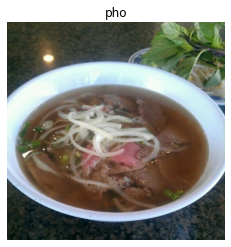

In [32]:
# Visualize images
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

### Preprocess images

* Images are in `uint8`. TensorFlow requires it as a `float`
* Images are of different sizes - will need to resize to `(224, 224, 3)`
* Images aren't scaled

Since the images are not the same size and not in the data type which is required, before passing it into `tf.keras.utils.image_dataset_from_directory()` additional preprocessing is required.

In [38]:
def preprocess_img(image, label, img_size=224):
  image = tf.image.resize(image, [img_size, img_size])
  # Not required to rescale since efficientnet does it
  # image = image / 255.
  return tf.cast(image, tf.float32), label

In [39]:
prepped_img = preprocess_img(image, label)[0]
prepped_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 46.2551   ,  49.2551   ,  28.255102 ],
        [ 49.954082 ,  54.954082 ,  32.954082 ],
        [ 42.494896 ,  50.494896 ,  27.494898 ],
        ...,
        [ 97.50995  , 129.86195  ,  81.4385   ],
        [ 94.02041  , 122.21427  ,  77.33163  ],
        [ 86.42833  , 112.71404  ,  68.78547  ]],

       [[ 45.336735 ,  48.336735 ,  27.336735 ],
        [ 53.714287 ,  58.714287 ,  36.714287 ],
        [ 40.44388  ,  48.44388  ,  25.443878 ],
        ...,
        [ 92.948906 , 128.3213   ,  74.52029  ],
        [ 85.48981  , 117.27552  ,  67.41838  ],
        [ 90.70417  , 122.48989  ,  72.632744 ]],

       [[ 48.795918 ,  53.795918 ,  30.79592  ],
        [ 59.428574 ,  64.42857  ,  41.428574 ],
        [ 52.57143  ,  57.52551  ,  34.693874 ],
        ...,
        [ 90.43876  , 127.77546  ,  74.03568  ],
        [ 98.26037  , 135.26038  ,  83.474655 ],
        [130.26054  , 164.68912  , 114.33198  ]],

       ...,

     

### Create image batches

Batch images so it can be loaded into RAM instead of loading all at once

`tf.data` API will be used to batch & load data in the most performant way possible.

**Note**:
* Cannot batch tensors of different shapes
* Cant `cache()` unless data can fit in memory
* For methods with the `num_parallel_calls` parameter available (such as `map()`), setting it `tonum_parallel_calls=tf.data.AUTOTUNE` will parallelize preprocessing and significantly improve speed
* `shuffle()` keeps a buffer of the number of images shuffled, ideally this number would be all of the samples in the training set, however, if it is large, this buffer might not fit in memory (a fairly large number like 1000 or 10000 is usually fine for shuffling)


```javascript
original dataset -> map() -> shuffle() -> batch() -> prefetch() -> PrefetchDataset
```

<center><img src='https://camo.githubusercontent.com/67531987edbdcecb1de790a3fbc9b2d2d95c45d1b95b6a8b34fe7064441a7994/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30372d7072656665746368696e672d66726f6d2d68616e64732d6f6e2d6d6c2e706e67' /></center>

> Map across training dataset -> shuffle before creating a batch -> prepare new batches (prefetch) whilst going through the first batch

In [47]:
# Map preprocessing function to training data (and paralellize - utilize all cores available)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle {buffer_size} train_data at a time & turn it into batches of size 32 and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [48]:
# Map preprocessing to test data - no need to shuffle test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### Create model callbacks

Checkpointing specifically is helpful to start fine-tuning on a specific epoch or also to continue training if the kernel dies

In [64]:
# Create model checkpoint callback
checkpoint_path = 'model_checkpoints/cp.ckpt'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='vall_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=0
)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

### Setup mixed precision training

*The act of training mixing `float16` and `float32` tensors to utilize GPU memory more efficiently, and in turn run faster*

`float32`: single-precision floating-point format (occupies 32 bits in computer memory)
`float16`: half-precision floating-point format (occupies 16 bits in computer memory)

Normally, tensors are `float32` unless specified.

A GPU can only handle a number of `float32` tensors at a time due to limited memory.

Modern accelerators (GPU, TPU) run operations faster in 16-bit dtypes, as they have specialized hardware to run 16-bit computations and 16-bit dtypes can be read from memory faster.
* A TPU runs computations faster on `bfloat16`, while a GPU does on `float16`

Handling multiple tensors at a time naturally means it'll run faster - up to 3x

**Side-note** GPUs with compatibility score of less than 7.0  don't support mixed precision training

<img src='https://camo.githubusercontent.com/835438dd552282857551ba5211f001f671cb21e2e5824643a7a9571921899158/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30372d6d697865642d707265636973696f6e2d737065656475702d657175616c732d33782d6770752e706e67' />

In [52]:
# Turn on mixed precision training
tf.keras.mixed_precision.set_global_policy(policy='mixed_float16')

In [54]:
tf.keras.mixed_precision.global_policy()

<Policy "mixed_float16">

The model will now utiize `float16` variables automatically where possible (in turn, speeding up training)

### Create feature extraction model

Recall, transfer learning order:
1. Build feature extraction model (replace top few layers)
2. Train for a few epochs with lower layers frozen
3. Fine-tune if necessary with more layers unfrozen

**Note**: Model will require a separate output layer with hard-coded `dtype=float32`, since it was set to `float16` in mixed precision. This ensure that the outputs are in `float32` - required because `float32` is more numerically stable

<img src='https://camo.githubusercontent.com/7a70722e7650bb87b667ab5358f3d4c066a12a0cbfba3a9fd6ae3732eb433526/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30372d6d697865642d707265636973696f6e2d636f64652d6265666f72652d616e642d61667465722e706e67' />

In [56]:
input_size = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(name='input_layer', shape=input_size)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='pooling_layer')(x)
x = tf.keras.layers.Dense(len(class_names))(x)

# Create separate output layer with hardcoded float32 to ensure stability
outputs = tf.keras.layers.Activation(activation='linear', dtype=tf.float32)(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [57]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 activation (Activation)     (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_____________________________________________

In [59]:
# Check layer info to ensure mixed_precision is in use
# Automatically sets dtype_policy to the global set policy
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
activation True float32 <Policy "float32">


In [61]:
# Check layers of base EfficientNetB0
for layer in model.layers[1].layers:
  # dtype - data type the layer stores its variables in
  # dtype_policy - data type the layer computes in
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_1 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False

**Note**: The mixed precision API automatically causes layers which can benefit from using the "mixed_float16" dtype policy to use it. It also prevents layers which shouldn't use it from using it

In [65]:
history_1 = model.fit(
    train_data,
    epochs=3,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        create_tensorboard_callback('logs', 'feature_extraction_logs'),
        model_checkpoint,
        early_stopping
    ]
)

Saving TensorBoard log files to: logs/feature_extraction_logs/20221004-052701
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.8211 - accuracy: 0.5568

2368/2368 [==============================] - 187s 71ms/step - loss: 1.8211 - accuracy: 0.5568 - val_loss: 1.2322 - val_accuracy: 0.6798
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: 1.2951 - accuracy: 0.6664

2368/2368 [==============================] - 169s 71ms/step - loss: 1.2951 - accuracy: 0.6664 - val_loss: 1.1230 - val_accuracy: 0.7076
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1440 - accuracy: 0.7030

2368/2368 [==============================] - 168s 70ms/step - loss: 1.1440 - accuracy: 0.7030 - val_loss: 1.0872 - val_accuracy: 0.7060


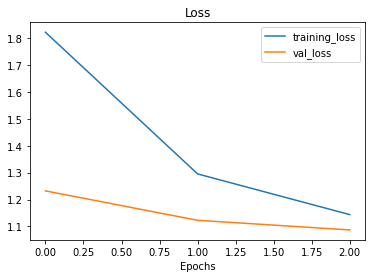

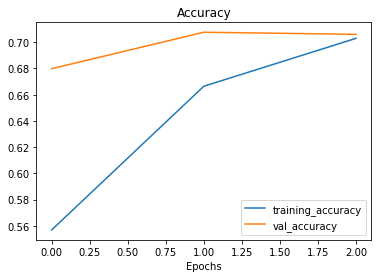

In [66]:
plot_loss_curves(history_1)

In [67]:
feat_extract_eval = model.evaluate(test_data)
feat_extract_eval

790/790 [==============================] - 50s 63ms/step - loss: 1.0898 - accuracy: 0.7055


[1.089764952659607, 0.7055049538612366]